# Sphere surface

dynamical notation for sympy

* https://stackoverflow.com/questions/25346132/is-it-possible-to-implement-newtons-dot-notation-or-lagranges-prime-notation
* https://www.youtube.com/watch?v=lWbeuDwYVto

In [16]:
from sympy import *

from IPython.display import display, Latex

from sympy.physics.vector import dynamicsymbols, init_vprinting
from sympy.physics import mechanics

R, g, r = symbols('R g r')

a, b, c, R = symbols('a b c R')

t = symbols('t')

u, v = dynamicsymbols("u v")

init_vprinting()

# u = Function("u")(t)
# v = Function("v")(t)

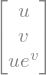

In [17]:
surface = 4

if surface == 0: # sphere
    x = R * cos(u) * cos(v)
    y = R * sin(u) * cos(v)
    z = R * sin(v)

    # transformation v += pi/2
    x = x.subs(v, v - pi/2)
    y = y.subs(v, v - pi/2)
    z = z.subs(v, v - pi/2)

elif surface == 1: # plan
    x = u
    y = v
    z = a*u+b*v

elif surface == 2: # tore
    x = (R + r * cos(v)) * cos(u)
    y = (R + r * cos(v)) * sin(u)
    z = r * sin(v)
    
    # transformation v += pi/2
    x = x.subs(v, v - pi/2)
    y = y.subs(v, v - pi/2)
    z = z.subs(v, v - pi/2)
    
elif surface == 3: # egg box
    x = u
    y = v
    z = R*cos(a*u)*cos(b*v)
elif surface == 4 : # rdm
    x = u
    y = v
    z = exp(v)*u
    

S = Matrix([x, y, z])

display(S)

### Dérivées partielles premières

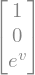

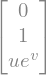

In [18]:
display(diff(S, u))
display(diff(S, v))

### Dérivées partielles secondes

In [19]:
display(diff(S, u, u).transpose())
display(diff(S, u, v).transpose())
display(diff(S, v, v).transpose())

In [20]:
F = Matrix([0, 0, -g])

ddS = diff(S, t, t)

ddu = diff(u, t, t)
ddv = diff(v, t, t)

eq = [ddS.dot(diff(S, d)) - F.dot(diff(S, d)) for d in (u, v)]

eq = [
    Eq(simplify(factor(_, (ddu, ddv))), 0) for _ in eq
]

display(*eq)